There are two main approaches to make inference for the delta method: direct estimation of the asymptotic variance using an analytic expression, or the use of the numerical derivative.

Direct Estimation of Asymptotic Variance

The direct estimation approach involves deriving an analytic expression for the asymptotic variance of the transformed parameter. This is done by applying the delta method to the function of interest.

Let θ be the parameter of interest, and g(θ) be the transformation we want to make inference about. Assume that we have a consistent estimator $\hat{\theta}$ of θ, with asymptotic distribution:

$$\sqrt{n}(\hat{\theta} - \theta) \xrightarrow{d} N(0, V_{\theta})$$

where $V_{\theta}$ is the asymptotic variance of $\hat{\theta}$.

The delta method states that the asymptotic distribution of $g(\hat{\theta})$ is:

$$\sqrt{n}(g(\hat{\theta}) - g(\theta)) \xrightarrow{d} N(0, [g'(\theta)]^2 V_{\theta})$$

where $g'(\theta)$ is the derivative of $g(\theta)$ with respect to $\theta$.

Therefore, the asymptotic variance of $g(\hat{\theta})$ is:

$$\widehat{Var}(g(\hat{\theta})) = [g'(\hat{\theta})]^2 \widehat{V}_{\theta}$$

where $\widehat{V}{\theta}$ is a consistent estimator of $V{\theta}$.

This analytic expression can be used to construct confidence intervals or perform hypothesis tests for the transformed parameter $g(\theta)$.

Numerical Derivative Approach

An alternative approach is to use numerical derivatives instead of deriving the analytic expression for the asymptotic variance. This can be useful when the function $g(\theta)$ is complicated or not easily differentiable.

The basic idea is to approximate the derivative $g'(\theta)$ using numerical methods, such as finite differences. Then, the asymptotic variance can be estimated as:

$$\widehat{Var}(g(\hat{\theta})) = [\widehat{g'(\theta)}]^2 \widehat{V}_{\theta}$$

where $\widehat{g'(\theta)}$ is the numerical approximation of the derivative.

This approach is generally easier to implement but may be less accurate than the direct estimation method, especially for complex functions.

In summary, the delta method allows making inferences about transformed parameters by either deriving an analytic expression for the asymptotic variance or using numerical derivatives. The choice between the two approaches depends on the complexity of the function and the availability of analytic derivatives.


In [7]:
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline
x = [1, 2, 3, 4, 5]  # Bin edges
y = [10, 15, 8, 12, 5]  # Frequencies

spline = UnivariateSpline(x, y, s=0, k=3)
spline

In [10]:
import numpy as np
x_smooth = np.linspace(min(x), max(x), 100)
x_smooth
y_smooth = spline(x_smooth)

In [12]:
y_smooth

array([10.        , 10.86834917, 11.66345494, 12.38757641, 13.04297266,
       13.63190281, 14.15662595, 14.61940117, 15.02248757, 15.36814425,
       15.65863031, 15.89620485, 16.08312695, 16.22165573, 16.31405027,
       16.36256968, 16.36947305, 16.33701948, 16.26746807, 16.16307791,
       16.0261081 , 15.85881775, 15.66346594, 15.44231177, 15.19761434,
       14.93163276, 14.64662611, 14.34485349, 14.02857401, 13.70004676,
       13.36153083, 13.01528532, 12.66356934, 12.30864198, 11.95276233,
       11.59818949, 11.24718257, 10.90200065, 10.56490285, 10.23814824,
        9.92399594,  9.62470503,  9.34253462,  9.0797438 ,  8.83859168,
        8.62133734,  8.43023989,  8.26755842,  8.13555203,  8.03647982,
        7.97250813,  7.94366994,  7.94786487,  7.98289977,  8.04658152,
        8.13671696,  8.25111297,  8.38757641,  8.54391413,  8.71793299,
        8.90743987,  9.11024162,  9.3241451 ,  9.54695718,  9.77648471,
       10.01053455, 10.24691358, 10.48342865, 10.71788662, 10.94

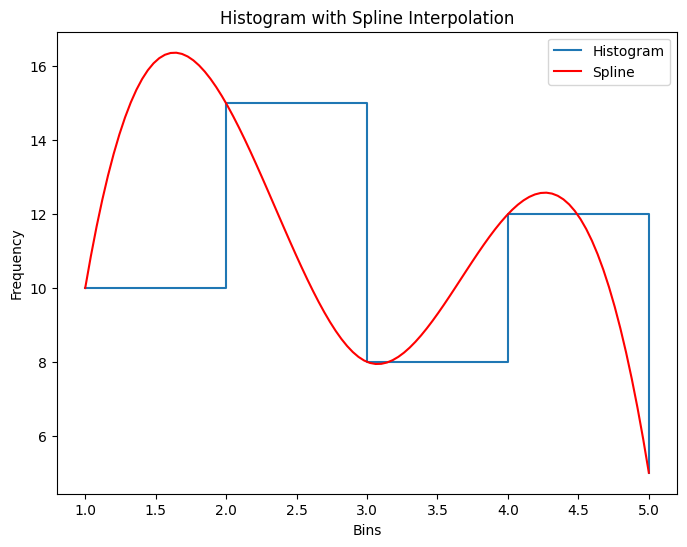

In [6]:
plt.figure(figsize=(8, 6))
plt.step(x, y, where='post', label='Histogram')
plt.plot(x_smooth, y_smooth, 'r-', label='Spline')
plt.xlabel('Bins')
plt.ylabel('Frequency')
plt.title('Histogram with Spline Interpolation')
plt.legend()
plt.show()

In [ ]:
import statsmodels.api as sm

# Assuming you have your data in a pandas DataFrame 'data'
X = data[list_of_covariates]  # List of covariates
A = data['treatment_indicator']  # Binary treatment indicator

# Fit the logistic regression model
logit_model = sm.Logit(A, sm.add_constant(X)).fit()


In [ ]:
estimated_propensity_scores = logit_model.predict(sm.add_constant(X))

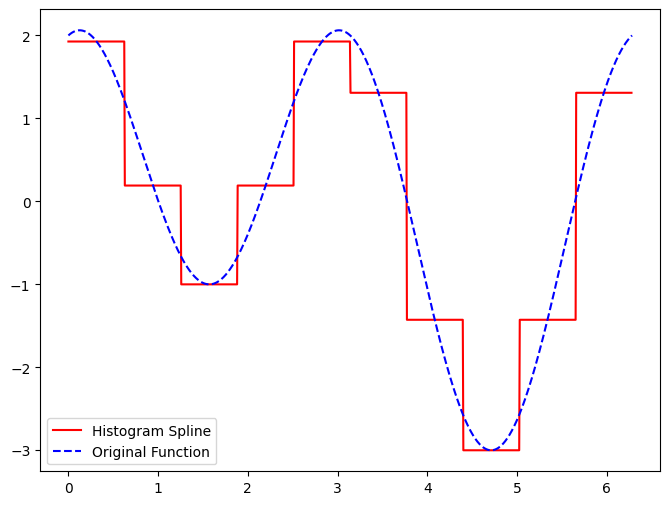

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function λ(x)
def lambda_func(x):
    return np.sin(x) + 2 * np.cos(2 * x)

# Define the domain and the number of intervals
x_min, x_max = 0, 2 * np.pi
num_intervals = 10

# Step 1: Divide the domain into intervals
x_intervals = np.linspace(x_min, x_max, num_intervals + 1)

# Step 2: Compute the average value of λ in each interval
lambda_averages = []
for i in range(num_intervals):
    x_left = x_intervals[i]
    x_right = x_intervals[i + 1]
    x_mid = 0.5 * (x_left + x_right)
    lambda_avg = lambda_func(x_mid)  # Approximate the average by evaluating at the midpoint
    lambda_averages.append(lambda_avg)

# Step 3: Define the piecewise constant function h(x)
def histogram_spline(x):
    for i in range(num_intervals):
        if x >= x_intervals[i] and x < x_intervals[i + 1]:
            return lambda_averages[i]

# Step 4: Plot the histogram spline
x_plot = np.linspace(x_min, x_max, 1000)
y_plot = [histogram_spline(x) for x in x_plot]

plt.figure(figsize=(8, 6))
plt.plot(x_plot, y_plot, 'r-', label='Histogram Spline')
plt.plot(x_plot, [lambda_func(x) for x in x_plot], 'b--', label='Original Function')
plt.legend()
plt.show()